In [3]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lane import LaneEval
%matplotlib inline

In [4]:
data_root = "/home/ubuntu/datasets/tusimple/train_set/"
date = "0313"

In [5]:
json_gt = [json.loads(line) for line in open(data_root + "label_data_" + date + ".json")]

In [6]:
gt = json_gt[0]
gt_lanes = gt['lanes']
y_samples = gt['h_samples']
raw_file = gt['raw_file']

print(y_samples)

[240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710]


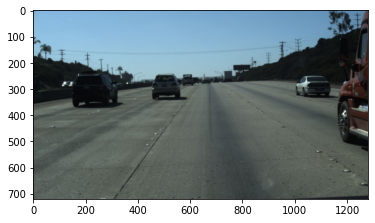

In [7]:
img = plt.imread(data_root+raw_file)
plt.imshow(img)
plt.show()

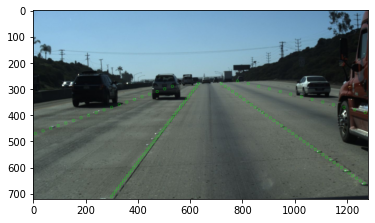

In [8]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    for pt in lane:
        cv2.circle(img_vis, pt, radius=5, color=(0, 255, 0))

plt.imshow(img_vis)
plt.show()

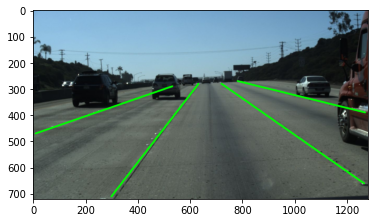

In [9]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,255,0), thickness=5)

plt.imshow(img_vis)
plt.show()

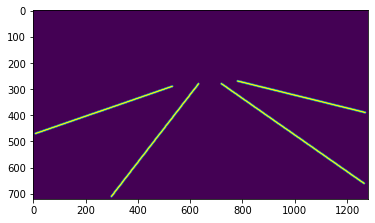

In [10]:
# create *binary* image

img_binary = np.zeros_like(img_vis)
img_binary = cv2.cvtColor(img_binary, cv2.COLOR_BGR2GRAY)

for lane in gt_lanes_vis:
    cv2.polylines(img_binary, np.int32([lane]), isClosed=False, color=255, thickness=5)  # threadhold

plt.imshow(img_binary)
plt.show()

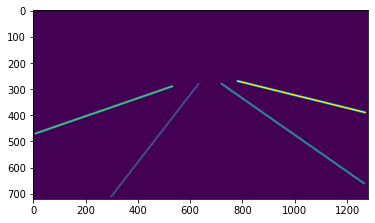

In [11]:
# create instance image

img_instance = img_binary.copy()

num_lines = len(gt_lanes_vis)
for i, lane in enumerate(gt_lanes_vis):
    cv2.polylines(img_instance, np.int32([lane]), isClosed=False, color=(i+1)*255/num_lines, thickness=5)

plt.imshow(img_instance)
plt.show()

### Notes:

- Wondering if the grayscale pixel values for the instance image matters for training. Does it have to be a certain value or can I split the intensities by the amount of lanes?